In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2017, 6, 1)
end = datetime.datetime(2021, 6, 1)

In [5]:
import quandl

In [6]:
symbol = 'WIKI/TSLA'
tsla_df = web.DataReader(symbol, 'quandl', '2017-06-01', '2021-06-01',0,api_key='VyMgAh2xwHRz5fEhZH4-')
symbol = 'WIKI/QCOM'
qcom_df = web.DataReader(symbol, 'quandl', '2017-06-01', '2021-06-01',0,api_key='VyMgAh2xwHRz5fEhZH4-')
symbol = 'WIKI/NKE'
nke_df = web.DataReader(symbol, 'quandl', '2017-06-01', '2021-06-01',0,api_key='VyMgAh2xwHRz5fEhZH4-')
symbol = 'WIKI/DIS'
dis_df = web.DataReader(symbol, 'quandl', '2017-06-01', '2021-06-01',0,api_key='VyMgAh2xwHRz5fEhZH4-')
symbol = 'WIKI/JNJ'
jnj_df = web.DataReader(symbol, 'quandl', '2017-06-01', '2021-06-01',0,api_key='VyMgAh2xwHRz5fEhZH4-')

In [7]:
qcom_df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,56.59,57.24,54.54,54.84,11972935.0,0.0,1.0,56.59,57.24,54.54,54.84,11972935.0
2018-03-26,54.58,56.14,54.25,56.13,11905323.0,0.0,1.0,54.58,56.14,54.25,56.13,11905323.0
2018-03-23,55.63,56.15,53.65,53.66,14509870.0,0.0,1.0,55.63,56.15,53.65,53.66,14509870.0
2018-03-22,56.24,56.83,55.52,55.58,13218154.0,0.0,1.0,56.24,56.83,55.52,55.58,13218154.0
2018-03-21,57.50,58.28,56.77,56.81,12122169.0,0.0,1.0,57.50,58.28,56.77,56.81,12122169.0


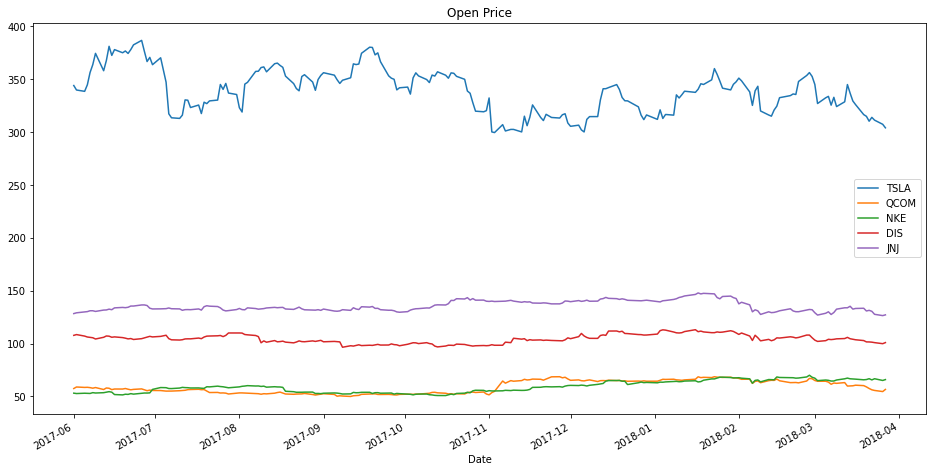

In [9]:
tsla_df['Open'].plot(label='TSLA',figsize=(16,8),title='Open Price')
qcom_df['Open'].plot(label='QCOM')
nke_df['Open'].plot(label='NKE')
dis_df['Open'].plot(label='DIS')
jnj_df['Open'].plot(label='JNJ')
plt.legend()

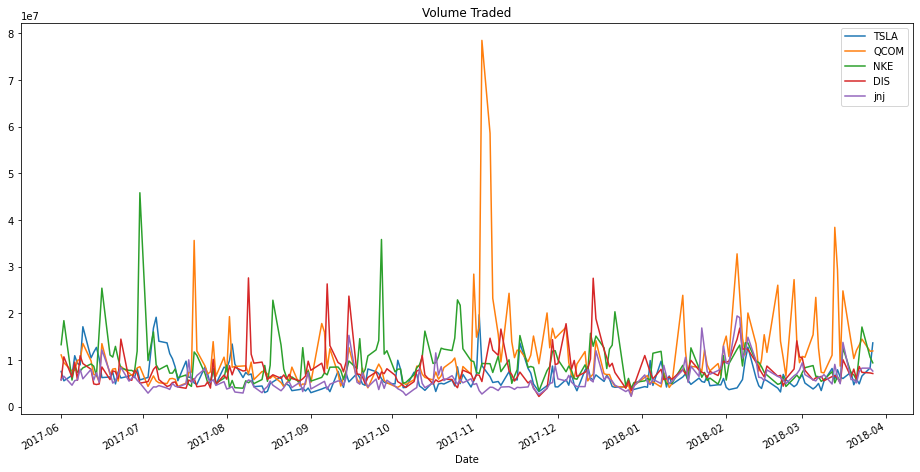

In [10]:
tsla_df['Volume'].plot(label='TSLA',figsize=(16,8),title='Volume Traded')
qcom_df['Volume'].plot(label='QCOM')
nke_df['Volume'].plot(label='NKE')
dis_df['Volume'].plot(label='DIS')
jnj_df['Volume'].plot(label='jnj')
plt.legend()

<AxesSubplot:xlabel='Date'>

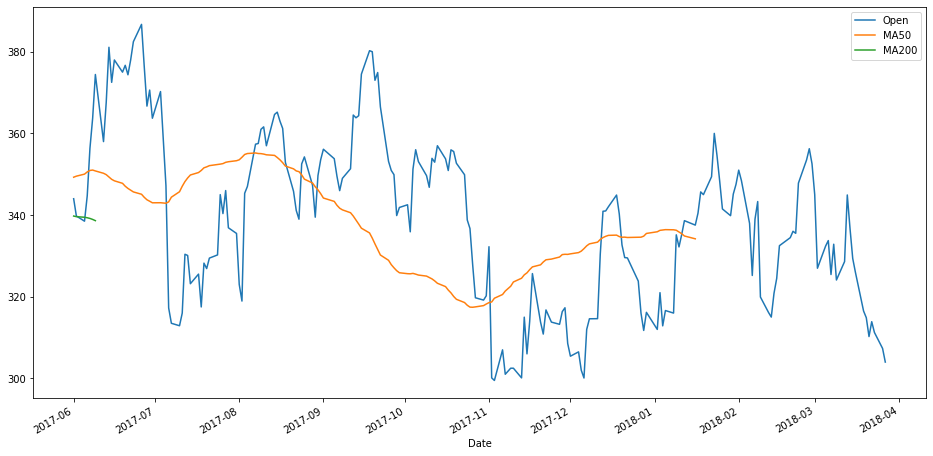

In [17]:
tsla_df['MA50'] = tsla_df['Open'].rolling(50).mean()
tsla_df['MA200'] = tsla_df['Open'].rolling(200).mean()
tsla_df[['Open','MA50','MA200']].plot(label='TSLA',figsize=(16,8))

In [18]:
from pandas.plotting import scatter_matrix

In [19]:
invest_comp = pd.concat([tsla_df['Open'],qcom_df['Open'],nke_df['Open'],dis_df['Open'],jnj_df['Open']],axis=1)

In [21]:
invest_comp.columns = ['Tesla Open','QCOM Open','NKE Open','DIS Open','JNJ Open']

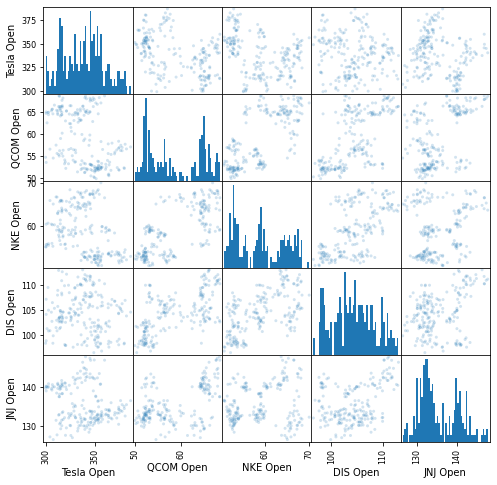

In [22]:
# You can use a semi-colon to remove the axes print outs
scatter_matrix(invest_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [24]:
# Method 1: Using shift
tsla_df['returns'] = (tsla_df['Close'] / tsla_df['Close'].shift(1) ) - 1

In [27]:
tsla_df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,MA50,MA200,returns
Date,,,,,,,,,,,,,,,
2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0,NaN,NaN,NaN
2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0,NaN,NaN,0.089548
2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0,NaN,NaN,-0.008679
2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0,NaN,NaN,0.025071
2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0,NaN,NaN,0.024038


In [26]:
tsla_df['returns'] = tsla_df['Close'].pct_change(1)

In [28]:
# Now repeat for the other dataframes
qcom_df['returns'] = qcom_df['Close'].pct_change(1)
nke_df['returns'] = nke_df['Close'].pct_change(1)
dis_df['returns'] = dis_df['Close'].pct_change(1)
jnj_df['returns'] = jnj_df['Close'].pct_change(1)

In [29]:
qcom_df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,returns
Date,,,,,,,,,,,,,
2018-03-27,56.59,57.24,54.54,54.84,11972935.0,0.0,1.0,56.59,57.24,54.54,54.84,11972935.0,NaN
2018-03-26,54.58,56.14,54.25,56.13,11905323.0,0.0,1.0,54.58,56.14,54.25,56.13,11905323.0,0.023523
2018-03-23,55.63,56.15,53.65,53.66,14509870.0,0.0,1.0,55.63,56.15,53.65,53.66,14509870.0,-0.044005
2018-03-22,56.24,56.83,55.52,55.58,13218154.0,0.0,1.0,56.24,56.83,55.52,55.58,13218154.0,0.035781
2018-03-21,57.50,58.28,56.77,56.81,12122169.0,0.0,1.0,57.50,58.28,56.77,56.81,12122169.0,0.022130


<AxesSubplot:>

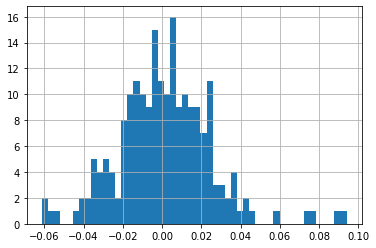

In [30]:
tsla_df['returns'].hist(bins=50)

<AxesSubplot:>

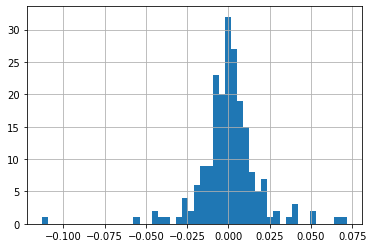

In [31]:
qcom_df['returns'].hist(bins=50)

<AxesSubplot:>

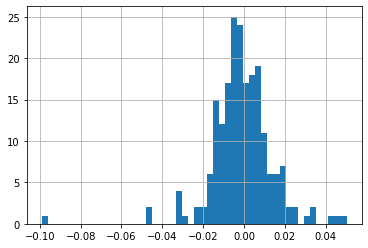

In [32]:
nke_df['returns'].hist(bins=50)

<AxesSubplot:>

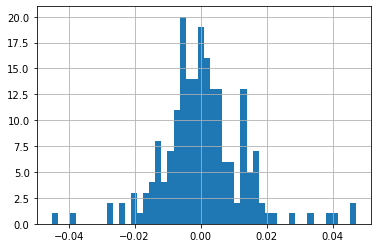

In [33]:
dis_df['returns'].hist(bins=50)

<AxesSubplot:>

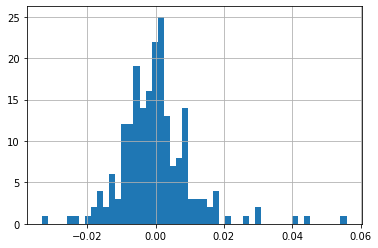

In [34]:
jnj_df['returns'].hist(bins=50)

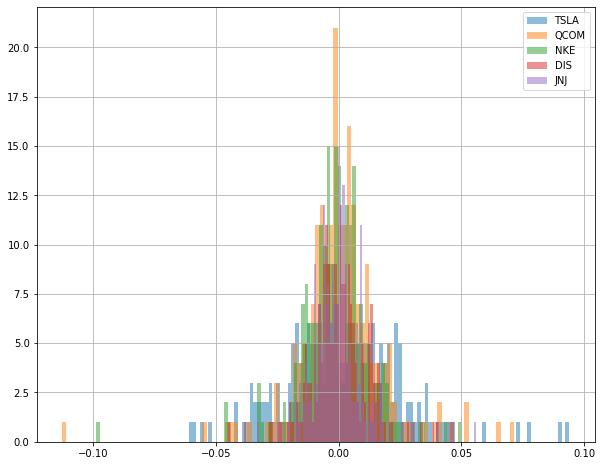

In [35]:
tsla_df['returns'].hist(bins=100,label='TSLA',figsize=(10,8),alpha=0.5)
qcom_df['returns'].hist(bins=100,label='QCOM',alpha=0.5)
nke_df['returns'].hist(bins=100,label='NKE',alpha=0.5)
dis_df['returns'].hist(bins=100,label='DIS',alpha=0.5)
jnj_df['returns'].hist(bins=100,label='JNJ',alpha=0.5)
plt.legend()

In [37]:
# tsla_df['returns'].plot(kind='kde',label='TSLA',figsize=(12,6))
# qcom_df['returns'].plot(kind='kde',label='QCOM')
# nke_df['returns'].plot(kind='kde',label='NKE')
# dis_df['returns'].plot(kind='kde',label='DIS')
# jnj_df['returns'].plot(kind='kde',label='JNJ')
# plt.legend()

<AxesSubplot:>

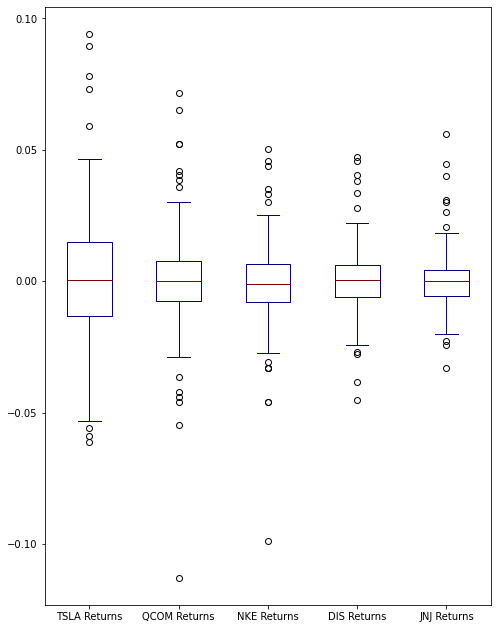

In [42]:
box_df = pd.concat([tsla_df['returns'],qcom_df['returns'],nke_df['returns'],dis_df['returns'],jnj_df['returns']],axis=1)
box_df.columns = ['TSLA Returns','QCOM Returns','NKE Returns','DIS Returns','JNJ Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

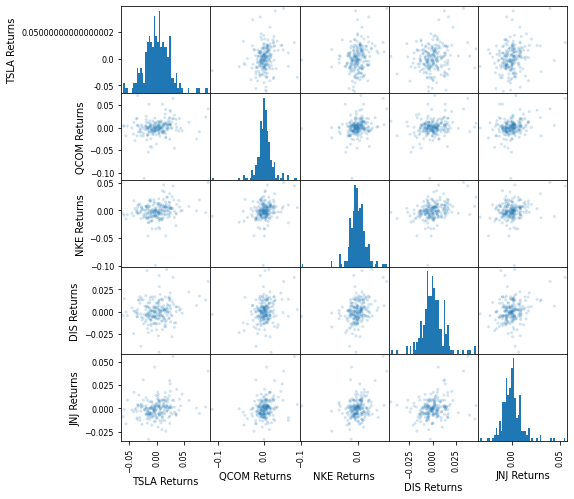

In [43]:
# Comparing Daily Returns between Stocks
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

<AxesSubplot:xlabel='NKE Returns', ylabel='QCOM Returns'>

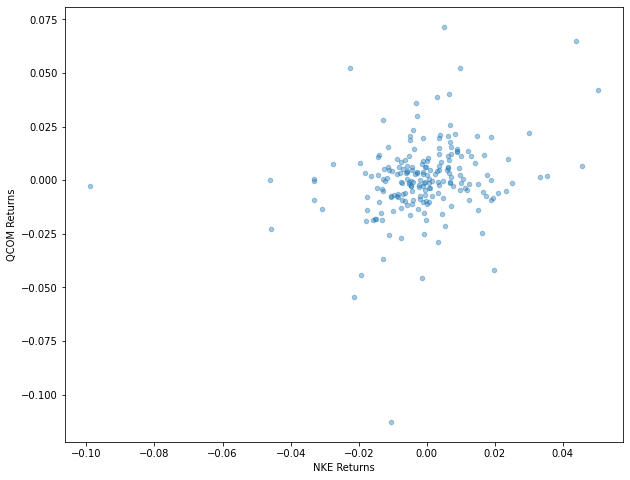

In [44]:
box_df.plot(kind='scatter',x='NKE Returns',y='QCOM Returns',alpha=0.4,figsize=(10,8))

In [45]:
# Cumulative returns is based off the wrong date (calc is based off end date not start date)

# Create a cumulative daily return column for each car company's dataframe
tsla_df['Cumulative Return'] = (1 + tsla_df['returns']).cumprod()
qcom_df['Cumulative Return'] = (1 + qcom_df['returns']).cumprod()
nke_df['Cumulative Return'] = (1 + nke_df['returns']).cumprod()
dis_df['Cumulative Return'] = (1 + dis_df['returns']).cumprod()
jnj_df['Cumulative Return'] = (1 + jnj_df['returns']).cumprod()

In [49]:
# tsla_df['Cumulative Return'].plot(label='TSLA',figsize=(16,8),title='Cumulative Return')
# qcom_df['Cumulative Return'].plot(label='QCOM')
# nke_df['Cumulative Return'].plot(label='NKE')
# dis_df['Cumulative Return'].plot(label='DIS')
# jnj_df['Cumulative Return'].plot(label='JNJ')
# plt.legend()

In [48]:
tsla_df.tail()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,,,,,,
2017-06-07,356.34,360.5000,355.14,359.65,9287888.0,0.0,1.0,356.34,360.5000,355.14,359.65,9287888.0,350.9240,339.17440,-0.027973,1.288237
2017-06-06,344.70,359.4929,339.97,352.85,10951473.0,0.0,1.0,344.70,359.4929,339.97,352.85,10951473.0,350.5580,339.34165,-0.018907,1.263880
2017-06-05,338.50,348.4400,334.21,347.32,6737855.0,0.0,1.0,338.50,348.4400,334.21,347.32,6737855.0,350.0240,339.46470,-0.015672,1.244072
2017-06-02,339.77,342.8800,335.93,339.85,5570256.0,0.0,1.0,339.77,342.8800,335.93,339.85,5570256.0,349.5268,339.61230,-0.021508,1.217315
2017-06-01,344.00,344.8800,337.29,340.37,7580447.0,0.0,1.0,344.00,344.8800,337.29,340.37,7580447.0,349.2674,339.75795,0.001530,1.219178
